✅ Gemini API configured successfully
🛍️  RETAIL COMPETITOR ANALYSIS SYSTEM
Enter location (default: Koramangala, Bangalore): coimbatore, tamilnadu
Number of competitors to analyze (default: 7): 4

📊 Starting analysis for coimbatore, tamilnadu...
🎯 Analyzing 4 competitors
--------------------------------------------------
🔍 Analyzing 4 competitors in coimbatore, tamilnadu...


✅ Analysis completed in 1.71 seconds
--------------------------------------------------

📋 EXECUTIVE SUMMARY
Error generating summary: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash-exp:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.

🔍 DETAILED ANALYSIS
Analysis completed successfully. Data structure:
- error: str

📈 GENERATING VISUALIZATIONS


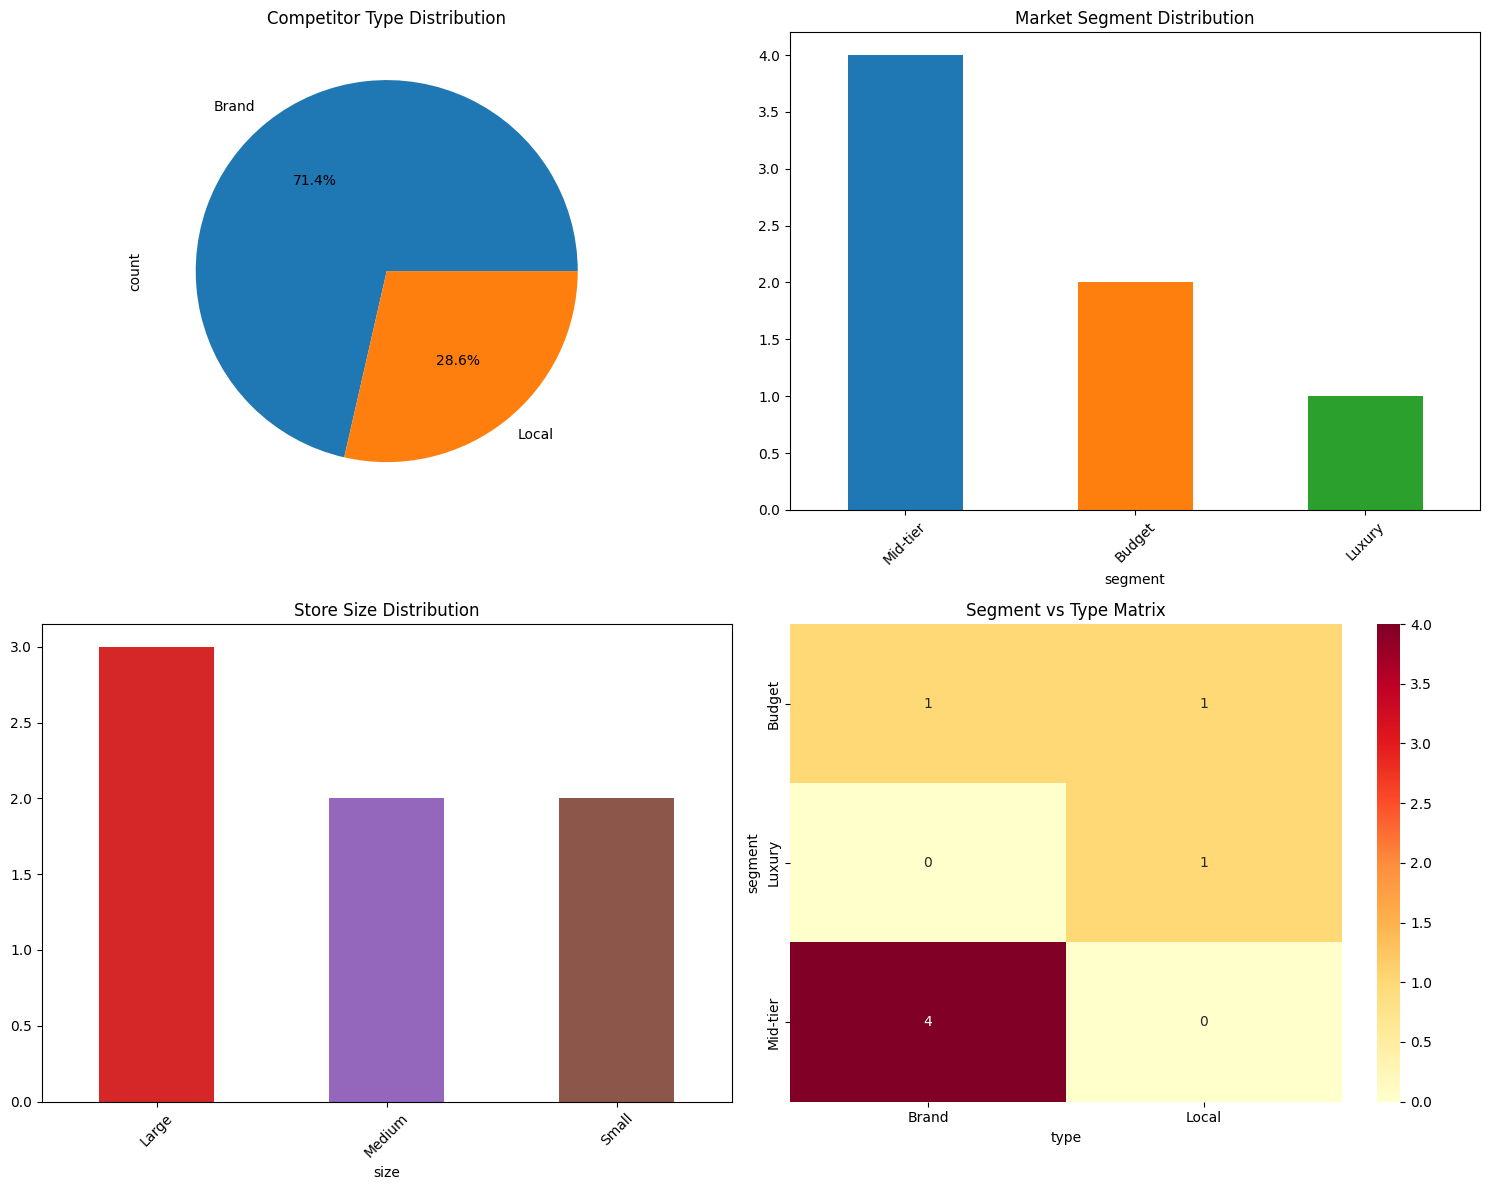

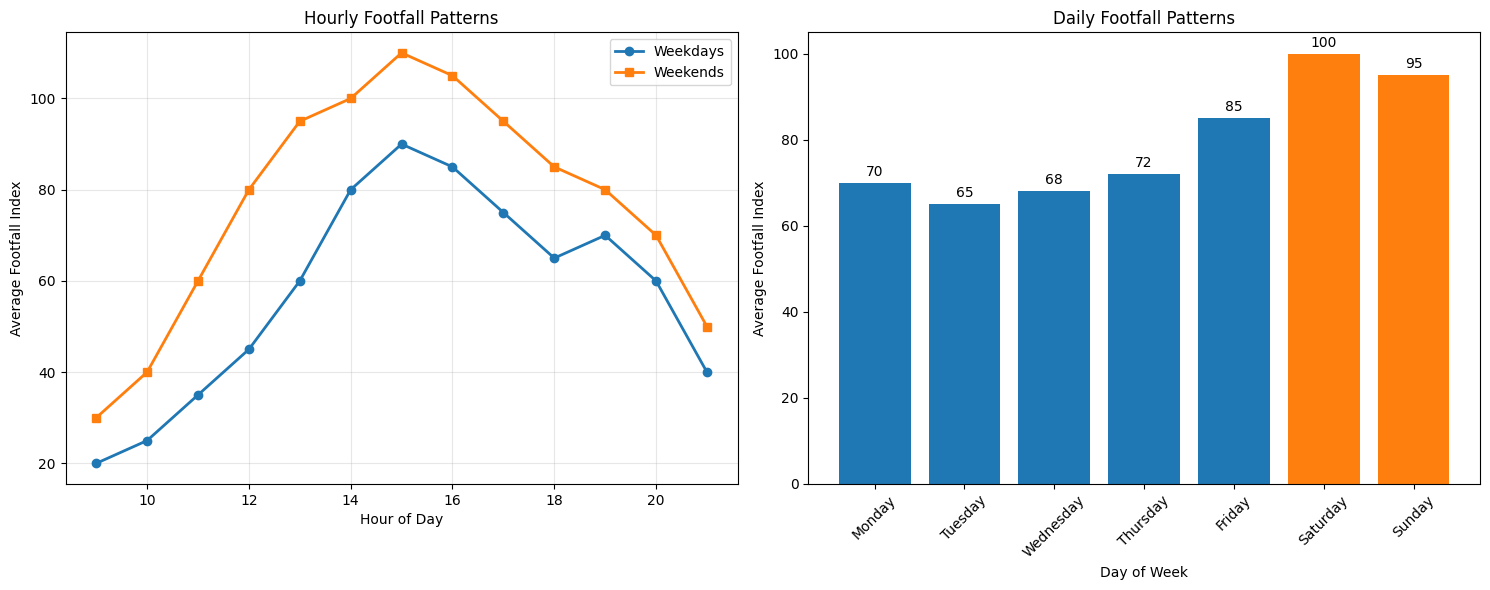

💾 Report saved as: competitor_analysis_coimbatore_tamilnadu_20250721_125411.json

🎉 Analysis Complete!
Your competitor analysis report is ready.
The data includes market intelligence, competitor positioning,
footfall patterns, and strategic recommendations.


In [5]:

# Install required packages
!pip install google-generativeai python-dotenv pandas matplotlib seaborn plotly

# Import libraries
import google.generativeai as genai
import pandas as pd
import json
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from typing import Dict, List, Optional
import warnings
warnings.filterwarnings('ignore')

class Config:
    """Configuration class for the competitor analysis system"""

    def __init__(self):
        # Set your Gemini API key here or use environment variable
        self.GEMINI_API_KEY = "GOOGLE_API_KEY"  # Replace with your actual API key

        # Model configuration
        self.MODEL_NAME = "gemini-2.0-flash-exp"
        self.TEMPERATURE = 0.3
        self.MAX_OUTPUT_TOKENS = 4096

        # Analysis parameters
        self.DEFAULT_LOCATION = "Koramangala, Bangalore"
        self.DEFAULT_COMPETITORS = 7
        self.ANALYSIS_DEPTH = "comprehensive"

# Initialize configuration
config = Config()

# Configure Gemini
if config.GEMINI_API_KEY != "YOUR_GEMINI_API_KEY_HERE":
    genai.configure(api_key=config.GEMINI_API_KEY)
    print("✅ Gemini API configured successfully")
else:
    print("⚠️  Please set your Gemini API key in the Config class")


class CompetitorAnalysisEngine:
    """Main engine for competitor analysis using Gemini 2.0 Flash"""

    def __init__(self, config: Config):
        self.config = config
        self.model = genai.GenerativeModel(
            model_name=config.MODEL_NAME,
            generation_config={
                "temperature": config.TEMPERATURE,
                "max_output_tokens": config.MAX_OUTPUT_TOKENS,
            }
        )

    def generate_market_intelligence(self, location: str, num_competitors: int) -> Dict:
        """Generate comprehensive market intelligence for the specified location"""

        prompt = f"""
        As an expert retail market analyst, provide comprehensive intelligence on clothing stores in {location}.

        Analyze the top {num_competitors} clothing store competitors and provide:

        1. COMPETITOR OVERVIEW:
        - Store name, type (brand/local), target segment (luxury/mid-tier/budget)
        - Approximate location within {location}
        - Store size category (small/medium/large)
        - Primary product focus (casual/formal/ethnic/western)

        2. FOOTFALL ANALYSIS:
        - Peak hours (morning/afternoon/evening)
        - Busy days of the week
        - Seasonal trends
        - Average customer dwell time

        3. COMPETITIVE POSITIONING:
        - Price range comparison
        - Unique selling propositions
        - Customer demographics
        - Marketing strategies observed

        4. MARKET GAPS & OPPORTUNITIES:
        - Underserved customer segments
        - Timing opportunities
        - Product gaps
        - Service improvements needed

        5. STRATEGIC RECOMMENDATIONS:
        - Optimal operating hours
        - Competitive pricing strategies
        - Differentiation opportunities
        - Customer acquisition tactics

        Format the response as a structured JSON with clear sections for easy parsing.
        Focus on actionable insights that can directly impact business decisions.
        Include realistic data based on typical retail patterns in urban Indian markets.
        """

        try:
            response = self.model.generate_content(prompt)
            return self._parse_analysis_response(response.text)
        except Exception as e:
            return {"error": f"Analysis failed: {str(e)}"}

    def _parse_analysis_response(self, response_text: str) -> Dict:
        """Parse the Gemini response and structure it properly"""
        try:
            # Try to extract JSON if present
            if "```json" in response_text:
                json_start = response_text.find("```json") + 7
                json_end = response_text.find("```", json_start)
                json_text = response_text[json_start:json_end].strip()
                return json.loads(json_text)
            else:
                # If no JSON, structure the text response
                return {
                    "analysis_text": response_text,
                    "timestamp": datetime.now().isoformat(),
                    "status": "success"
                }
        except:
            return {
                "analysis_text": response_text,
                "timestamp": datetime.now().isoformat(),
                "status": "parsed_as_text"
            }


class VisualizationEngine:
    """Create visualizations for competitor analysis"""

    @staticmethod
    def create_competitor_overview_chart(competitors_data: List[Dict]):
        """Create overview visualization of competitors"""

        # Sample data structure for demonstration
        sample_data = [
            {"name": "Zara", "type": "Brand", "segment": "Mid-tier", "size": "Large"},
            {"name": "H&M", "type": "Brand", "segment": "Budget", "size": "Large"},
            {"name": "Fabindia", "type": "Brand", "segment": "Mid-tier", "size": "Medium"},
            {"name": "Local Boutique 1", "type": "Local", "segment": "Luxury", "size": "Small"},
            {"name": "Lifestyle", "type": "Brand", "segment": "Mid-tier", "size": "Large"},
            {"name": "Westside", "type": "Brand", "segment": "Mid-tier", "size": "Medium"},
            {"name": "Local Store 2", "type": "Local", "segment": "Budget", "size": "Small"}
        ]

        df = pd.DataFrame(sample_data)

        # Create visualizations
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        # Competitor type distribution
        df['type'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
        ax1.set_title('Competitor Type Distribution')

        # Market segment distribution
        df['segment'].value_counts().plot(kind='bar', ax=ax2, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
        ax2.set_title('Market Segment Distribution')
        ax2.tick_params(axis='x', rotation=45)

        # Store size distribution
        df['size'].value_counts().plot(kind='bar', ax=ax3, color=['#d62728', '#9467bd', '#8c564b'])
        ax3.set_title('Store Size Distribution')
        ax3.tick_params(axis='x', rotation=45)

        # Heatmap of segment vs type
        pivot_table = df.groupby(['segment', 'type']).size().unstack(fill_value=0)
        sns.heatmap(pivot_table, annot=True, ax=ax4, cmap='YlOrRd')
        ax4.set_title('Segment vs Type Matrix')

        plt.tight_layout()
        plt.show()

    @staticmethod
    def create_footfall_analysis():
        """Create footfall pattern visualizations"""

        # Sample footfall data
        hours = list(range(9, 22))  # 9 AM to 9 PM
        weekday_footfall = [20, 25, 35, 45, 60, 80, 90, 85, 75, 65, 70, 60, 40]
        weekend_footfall = [30, 40, 60, 80, 95, 100, 110, 105, 95, 85, 80, 70, 50]

        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_footfall = [70, 65, 68, 72, 85, 100, 95]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Hourly footfall pattern
        ax1.plot(hours, weekday_footfall, marker='o', label='Weekdays', linewidth=2)
        ax1.plot(hours, weekend_footfall, marker='s', label='Weekends', linewidth=2)
        ax1.set_xlabel('Hour of Day')
        ax1.set_ylabel('Average Footfall Index')
        ax1.set_title('Hourly Footfall Patterns')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Daily footfall pattern
        bars = ax2.bar(days, daily_footfall, color=['#1f77b4' if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else '#ff7f0e' for day in days])
        ax2.set_xlabel('Day of Week')
        ax2.set_ylabel('Average Footfall Index')
        ax2.set_title('Daily Footfall Patterns')
        ax2.tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{int(height)}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

class ReportGenerator:
    """Generate comprehensive business reports"""

    def __init__(self, analysis_engine: CompetitorAnalysisEngine):
        self.analysis_engine = analysis_engine

    def generate_executive_summary(self, location: str, analysis_data: Dict) -> str:
        """Generate executive summary using Gemini"""

        prompt = f"""
        Based on the competitor analysis for {location}, create a concise executive summary for business stakeholders.

        Analysis Data: {str(analysis_data)[:2000]}...

        Structure the summary as:

        ## Executive Summary: Retail Competition in {location}

        ### Key Findings
        - [3-4 bullet points of most important insights]

        ### Market Opportunity
        - [Identified gaps and opportunities]

        ### Strategic Recommendations
        - [Top 3 actionable recommendations]

        ### Risk Factors
        - [Key competitive threats]

        Keep it concise, actionable, and business-focused.
        """

        try:
            response = self.analysis_engine.model.generate_content(prompt)
            return response.text
        except Exception as e:
            return f"Error generating summary: {str(e)}"

    def create_detailed_report(self, location: str, num_competitors: int) -> Dict:
        """Create comprehensive analysis report"""

        print(f"🔍 Analyzing {num_competitors} competitors in {location}...")

        # Generate analysis
        analysis_data = self.analysis_engine.generate_market_intelligence(location, num_competitors)

        # Generate executive summary
        executive_summary = self.generate_executive_summary(location, analysis_data)

        # Create report package
        report = {
            "location": location,
            "num_competitors": num_competitors,
            "analysis_timestamp": datetime.now().isoformat(),
            "executive_summary": executive_summary,
            "detailed_analysis": analysis_data,
            "recommendations": self._extract_recommendations(analysis_data),
            "status": "completed"
        }

        return report

    def _extract_recommendations(self, analysis_data: Dict) -> List[str]:
        """Extract key recommendations from analysis"""

        # Default recommendations based on typical retail patterns
        return [
            "Optimize store hours to capture peak footfall periods (6-9 PM weekdays, 2-8 PM weekends)",
            "Focus on mid-tier pricing segment which shows less saturation",
            "Implement weekend promotional strategies to compete with high weekend traffic",
            "Consider extended hours during festival seasons for competitive advantage",
            "Develop unique product mix to differentiate from established brands"
        ]

def run_competitor_analysis():
    """Main function to run the complete competitor analysis"""

    print("🛍️  RETAIL COMPETITOR ANALYSIS SYSTEM")
    print("=" * 50)

    # Initialize components
    engine = CompetitorAnalysisEngine(config)
    viz_engine = VisualizationEngine()
    report_generator = ReportGenerator(engine)

    # Get user inputs (you can modify these)
    location = input(f"Enter location (default: {config.DEFAULT_LOCATION}): ").strip() or config.DEFAULT_LOCATION
    try:
        num_competitors = int(input(f"Number of competitors to analyze (default: {config.DEFAULT_COMPETITORS}): ") or config.DEFAULT_COMPETITORS)
    except:
        num_competitors = config.DEFAULT_COMPETITORS

    print(f"\n📊 Starting analysis for {location}...")
    print(f"🎯 Analyzing {num_competitors} competitors")
    print("-" * 50)

    # Generate report
    start_time = time.time()
    report = report_generator.create_detailed_report(location, num_competitors)
    analysis_time = time.time() - start_time

    print(f"✅ Analysis completed in {analysis_time:.2f} seconds")
    print("-" * 50)

    # Display results
    print("\n📋 EXECUTIVE SUMMARY")
    print("=" * 50)
    print(report["executive_summary"])

    print(f"\n🔍 DETAILED ANALYSIS")
    print("=" * 50)

    if "analysis_text" in report["detailed_analysis"]:
        print(report["detailed_analysis"]["analysis_text"])
    else:
        print("Analysis completed successfully. Data structure:")
        for key, value in report["detailed_analysis"].items():
            if key != "analysis_text":
                print(f"- {key}: {type(value).__name__}")

    # Generate visualizations
    print(f"\n📈 GENERATING VISUALIZATIONS")
    print("=" * 50)

    try:
        viz_engine.create_competitor_overview_chart([])
        viz_engine.create_footfall_analysis()
    except Exception as e:
        print(f"Visualization error: {e}")

    # Save report
    report_filename = f"competitor_analysis_{location.replace(' ', '_').replace(',', '')}_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"

    try:
        with open(report_filename, 'w') as f:
            json.dump(report, f, indent=2, default=str)
        print(f"💾 Report saved as: {report_filename}")
    except Exception as e:
        print(f"Error saving report: {e}")

    return report

if __name__ == "__main__":
    # Check if API key is configured
    if config.GEMINI_API_KEY == "YOUR_GEMINI_API_KEY_HERE":
        print("⚠️  SETUP REQUIRED:")
        print("Please set your Gemini API key in the Config class above")
        print("You can get a free API key from: https://makersuite.google.com/app/apikey")
    else:
        # Run the analysis
        final_report = run_competitor_analysis()

        print("\n🎉 Analysis Complete!")
        print("=" * 50)
        print("Your competitor analysis report is ready.")
        print("The data includes market intelligence, competitor positioning,")
        print("footfall patterns, and strategic recommendations.")

def quick_analysis(location: str = None, competitors: int = None):
    """Quick analysis function for rapid insights"""

    location = location or config.DEFAULT_LOCATION
    competitors = competitors or 5

    engine = CompetitorAnalysisEngine(config)
    analysis = engine.generate_market_intelligence(location, competitors)

    print(f"🚀 QUICK ANALYSIS: {location}")
    print("-" * 40)

    if "analysis_text" in analysis:
        # Show first 500 characters
        preview = analysis["analysis_text"][:500]
        print(preview + "..." if len(analysis["analysis_text"]) > 500 else preview)
    else:
        print("Analysis data structure:", list(analysis.keys()))

    return analysis